In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device}")

Using cuda


Creating DATA for linear regression

In [ ]:
weight = 0.8
bias = 0.52

start = 0
end = 1.5
step = 0.03

x = torch.arange(start, end , step).unsqueeze(dim =1)
y = weight *x +bias
x[:10], y[:10]


(tensor([[0.0000],
         [0.0300],
         [0.0600],
         [0.0900],
         [0.1200],
         [0.1500],
         [0.1800],
         [0.2100],
         [0.2400],
         [0.2700]]),
 tensor([[0.5200],
         [0.5440],
         [0.5680],
         [0.5920],
         [0.6160],
         [0.6400],
         [0.6640],
         [0.6880],
         [0.7120],
         [0.7360]]))

In [ ]:
split = int(0.8* len(x))
x_train, y_train = x[:split],y[:split]
x_test, y_test =x[split:], y[split:]
len(x_train), len(y_train) , len(x_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data = x_train,
                     train_labels= y_train,
                     test_data = x_test,
                     test_labels = y_test,
                     predictions = None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training Data")

  plt.scatter(test_data,test_labels, c="g",s=4,label = "Testing data")


  if predictions is not None:
    plt.scatter(test_data,predictions, c="r",s=4,label="predictions")

  plt.legend(prop={"size" : 14})

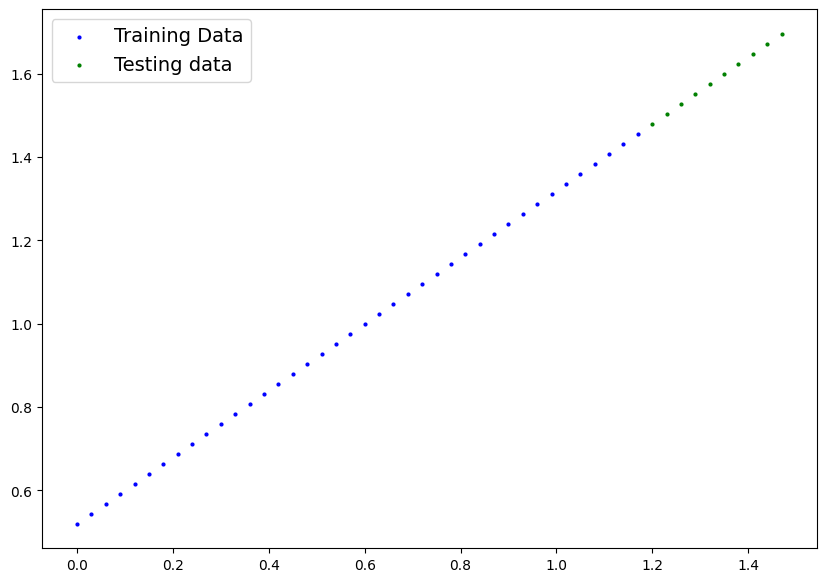

In [ ]:
plot_predictions(x_train,y_train, x_test,y_test)

In [ ]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features =1)
  def forward(self,x: torch.Tensor)->torch.Tensor:
    return self.linear_layer(x)



In [ ]:
torch.manual_seed(42)
model = LinearRegressionModelV2()
model.state_dict()


OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [ ]:
with torch.inference_mode():
  y_preds = model(x_test)

y_preds

tensor([[1.7475],
        [1.7704],
        [1.7933],
        [1.8163],
        [1.8392],
        [1.8621],
        [1.8851],
        [1.9080],
        [1.9309],
        [1.9539]])

In [ ]:
model.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
loss_fn = nn.MSELoss()
optimiser = torch.optim.SGD(params = model.parameters(),
                        lr =0.01)



In [ ]:
epoch_count = []
loss_values = []
test_loss_values = []

In [ ]:
epochs=300
x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model.train()

  y_pred=model(x_train)
  loss = loss_fn(y_pred,y_train)
  optimiser.zero_grad()
  loss.backward()
  optimiser.step()

  model.eval()
  with torch.inference_mode():
    test_pred = model(x_test)

    test_loss = loss_fn(test_pred,y_test.type(torch.float))

  if epoch%10==0:
    # epoch_count.append(epoch)
    # loss_values.append(loss.detach().numpy())
    # test_loss_values.append(test_loss.detach().numpy())
    print(f"Epoch : {epoch} and loss : {loss}")
    print(model.state_dict())



Epoch : 0 and loss : 2.5438788725296035e-05
OrderedDict([('linear_layer.weight', tensor([[0.7856]], device='cuda:0')), ('linear_layer.bias', tensor([0.5292], device='cuda:0'))])
Epoch : 10 and loss : 2.4565932108089328e-05
OrderedDict([('linear_layer.weight', tensor([[0.7859]], device='cuda:0')), ('linear_layer.bias', tensor([0.5290], device='cuda:0'))])
Epoch : 20 and loss : 2.3722725018160418e-05
OrderedDict([('linear_layer.weight', tensor([[0.7861]], device='cuda:0')), ('linear_layer.bias', tensor([0.5289], device='cuda:0'))])
Epoch : 30 and loss : 2.2908659957465716e-05
OrderedDict([('linear_layer.weight', tensor([[0.7864]], device='cuda:0')), ('linear_layer.bias', tensor([0.5287], device='cuda:0'))])
Epoch : 40 and loss : 2.2122456357465126e-05
OrderedDict([('linear_layer.weight', tensor([[0.7866]], device='cuda:0')), ('linear_layer.bias', tensor([0.5286], device='cuda:0'))])
Epoch : 50 and loss : 2.136336661351379e-05
OrderedDict([('linear_layer.weight', tensor([[0.7868]], device

In [ ]:
model.eval()

with torch.inference_mode():
  y_preds = model(x_test)
y_preds

tensor([[1.4752],
        [1.4990],
        [1.5227],
        [1.5465],
        [1.5702],
        [1.5940],
        [1.6177],
        [1.6415],
        [1.6652],
        [1.6889]], device='cuda:0')

OrderedDict([('linear_layer.weight', tensor([[0.7915]], device='cuda:0')), ('linear_layer.bias', tensor([0.5255], device='cuda:0'))])


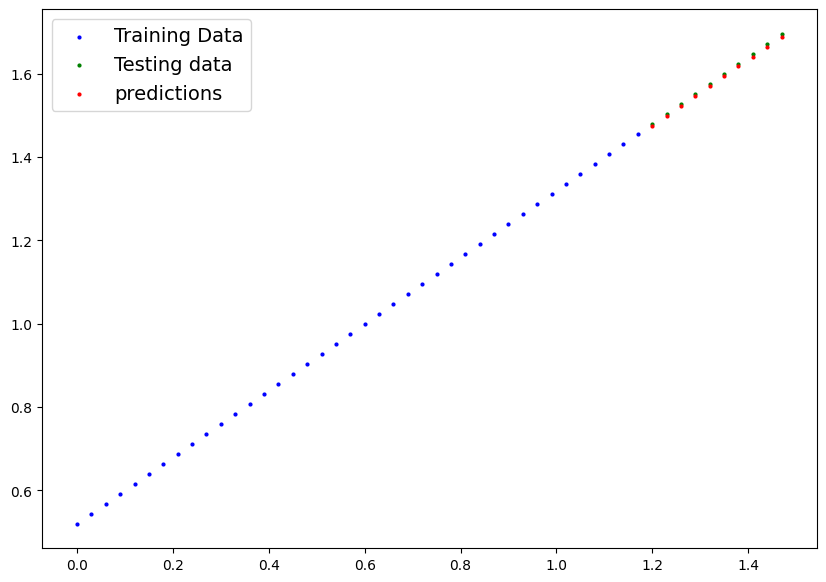

In [ ]:
print(model.state_dict())
plot_predictions(predictions=y_preds.to("cpu"))

Saving and loading

In [ ]:
from pathlib import Path
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents = True,exist_ok=True)

MODEL_NAME = "we_go_again.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

print(f"Saving model {MODEL_NAME}")
torch.save(obj = model.state_dict(), f = MODEL_SAVE_PATH)

Saving model we_go_again.pth


In [ ]:
loaded_model = LinearRegressionModelV2()

loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))


<All keys matched successfully>

In [ ]:
loaded_model.to("cuda")

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
with torch.inference_mode():
  loaded_preds = loaded_model(x_test)
loaded_preds

tensor([[1.4752],
        [1.4990],
        [1.5227],
        [1.5465],
        [1.5702],
        [1.5940],
        [1.6177],
        [1.6415],
        [1.6652],
        [1.6889]], device='cuda:0')

In [ ]:
y_preds == loaded_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')